In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score
from scipy.optimize import curve_fit

In [2]:
data_path = 'data\\initialFF__0.782.txt'
data = pd.read_csv(data_path, sep=",", header=None)
data.columns = ['x(m)', 'Y']
data = data.drop([0])  # Drop the first row which contains the old header

# Convert the columns to numeric
data['x(m)'] = pd.to_numeric(data['x(m)'])
data['Y'] = pd.to_numeric(data['Y'])


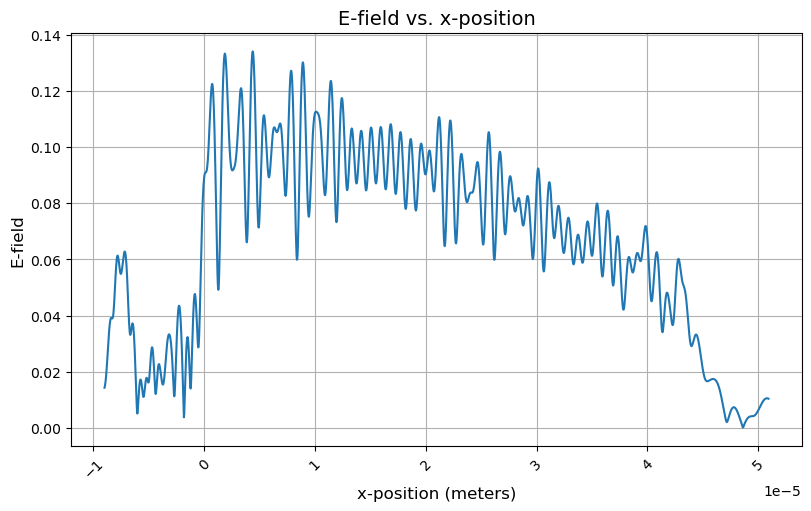

In [3]:
# Plot the data
fig, ax = plt.subplots(figsize=(8, 5), layout='constrained')
ax.plot(data['x(m)'], data['Y'], marker='', linestyle='-')

# Use scientific notation for x-axis tick labels if appropriate
ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

# Increase label font size for readability and add a title
ax.set_xlabel('x-position (meters)', fontsize=12)
ax.set_ylabel('E-field', fontsize=12)
ax.set_title('E-field vs. x-position', fontsize=14)

# Rotate x-axis tick labels to prevent overlap
ax.tick_params(axis='x', labelrotation=45, labelsize=10)

# Show grid
ax.grid(True)

plt.show()

In [4]:
def gaussian(x, A, mu, sig): #A: Flaeche der Gaussfunktion
    return A*np.exp(-(x-mu)**2/2/sig**2)

In [5]:
popt, pcov=curve_fit(gaussian,data['x(m)'],data['Y'], p0= [1/210000, 20E-6, 15e-6])
x=np.linspace(-10E-6,50E-6, 100)

window_size = 40


In [6]:
running_av = data['Y'].rolling(window=window_size).mean()
print(running_av.shape)
print(gaussian(data['x(m)'],*popt).shape)
running_av[:40] = gaussian(data['x(m)'],*popt)[:40]
nan_values = running_av.isna()
print(nan_values.sum())
nan_values2 = gaussian(data['x(m)'],*popt).isna()
print(nan_values2.sum())

(1999,)
(1999,)
0
0


0.7771649002480389


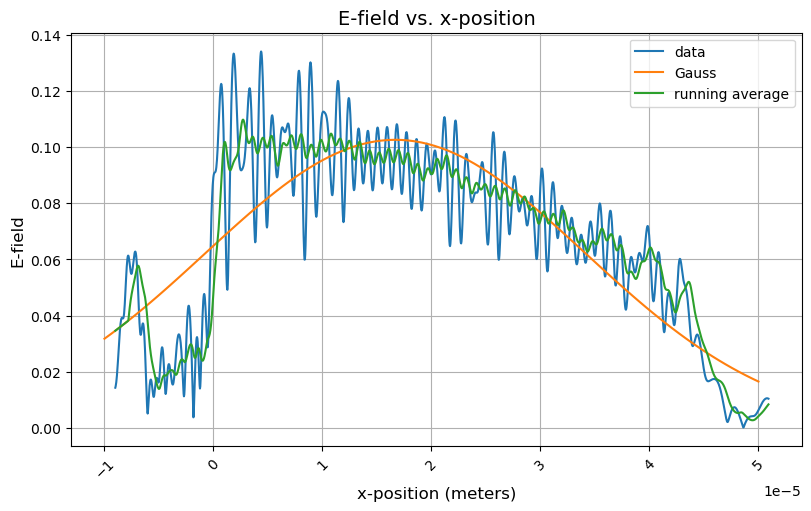

In [7]:
# Plot the data
fig, ax = plt.subplots(figsize=(8, 5), layout='constrained')
ax.plot(data['x(m)'], data['Y'], marker='', linestyle='-', label = 'data')
ax.plot(x, gaussian(x,*popt), label='Gauss')

running_av = data['Y'].rolling(window=window_size).mean()
running_av[:40] = gaussian(data['x(m)'],*popt)[:40]
ax.plot(data['x(m)'], running_av, label = 'running average')
r2_running = r2_score(running_av, gaussian(data['x(m)'],*popt))
print(r2_running)

# Use scientific notation for x-axis tick labels if appropriate
ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

# Increase label font size for readability and add a title
ax.set_xlabel('x-position (meters)', fontsize=12)
ax.set_ylabel('E-field', fontsize=12)
ax.set_title('E-field vs. x-position', fontsize=14)

# Rotate x-axis tick labels to prevent overlap
ax.tick_params(axis='x', labelrotation=45, labelsize=10)

# Show grid
ax.grid(True)
ax.legend()
plt.show()

In [8]:
r2 = r2_score(data['Y'], gaussian(data['x(m)'],*popt))
print(r2)

0.6988269505612545


0.8543193850921372


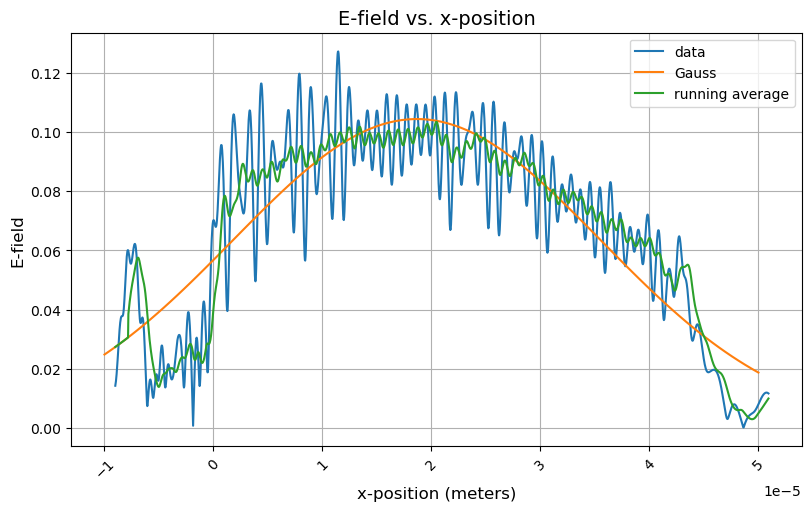

0.7670984913305179


In [9]:
data_path = 'data\\initialFF__0.838.txt'
data = pd.read_csv(data_path, sep=",", header=None)
data.columns = ['x(m)', 'Y']
data = data.drop([0])  # Drop the first row which contains the old header

# Convert the columns to numeric
data['x(m)'] = pd.to_numeric(data['x(m)'])
data['Y'] = pd.to_numeric(data['Y'])

popt, pcov=curve_fit(gaussian,data['x(m)'],data['Y'], p0= [1/210000, 20E-6, 15e-6])
x=np.linspace(-10E-6,50E-6, 100)

# Plot the data
fig, ax = plt.subplots(figsize=(8, 5), layout='constrained')
ax.plot(data['x(m)'], data['Y'], marker='', linestyle='-', label = 'data')
ax.plot(x, gaussian(x,*popt), label='Gauss')

running_av = data['Y'].rolling(window=window_size).mean()
running_av[:40] = gaussian(data['x(m)'],*popt)[:40]
ax.plot(data['x(m)'], running_av, label = 'running average')
r2_running = r2_score(running_av, gaussian(data['x(m)'],*popt))
print(r2_running)

# Use scientific notation for x-axis tick labels if appropriate
ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

# Increase label font size for readability and add a title
ax.set_xlabel('x-position (meters)', fontsize=12)
ax.set_ylabel('E-field', fontsize=12)
ax.set_title('E-field vs. x-position', fontsize=14)

# Rotate x-axis tick labels to prevent overlap
ax.tick_params(axis='x', labelrotation=45, labelsize=10)

# Show grid
ax.grid(True)
ax.legend()
plt.show()

r2 = r2_score(data['Y'], gaussian(data['x(m)'],*popt))
print(r2)

In [13]:
print(data['x(m)'])

1      -0.000009
2      -0.000009
3      -0.000009
4      -0.000009
5      -0.000009
          ...   
1995    0.000051
1996    0.000051
1997    0.000051
1998    0.000051
1999    0.000051
Name: x(m), Length: 1999, dtype: float64


0.9088741423522081


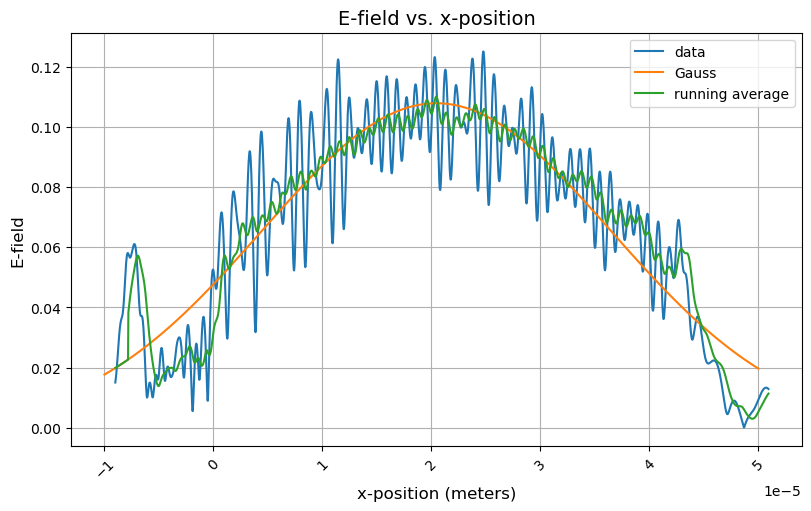

0.819144118914516


In [10]:
data_path = 'data\\initialFF__0.894.txt'
data = pd.read_csv(data_path, sep=",", header=None)
data.columns = ['x(m)', 'Y']
data = data.drop([0])  # Drop the first row which contains the old header

# Convert the columns to numeric
data['x(m)'] = pd.to_numeric(data['x(m)'])
data['Y'] = pd.to_numeric(data['Y'])

popt, pcov=curve_fit(gaussian,data['x(m)'],data['Y'], p0= [1/210000, 20E-6, 15e-6])
x=np.linspace(-10E-6,50E-6, 100)

# Plot the data
fig, ax = plt.subplots(figsize=(8, 5), layout='constrained')
ax.plot(data['x(m)'], data['Y'], marker='', linestyle='-', label = 'data')
ax.plot(x, gaussian(x,*popt), label='Gauss')

running_av = data['Y'].rolling(window=window_size).mean()
running_av[:40] = gaussian(data['x(m)'],*popt)[:40]
ax.plot(data['x(m)'], running_av, label = 'running average')
r2_running = r2_score(running_av, gaussian(data['x(m)'],*popt))
print(r2_running)

# Use scientific notation for x-axis tick labels if appropriate
ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

# Increase label font size for readability and add a title
ax.set_xlabel('x-position (meters)', fontsize=12)
ax.set_ylabel('E-field', fontsize=12)
ax.set_title('E-field vs. x-position', fontsize=14)

# Rotate x-axis tick labels to prevent overlap
ax.tick_params(axis='x', labelrotation=45, labelsize=10)

# Show grid
ax.grid(True)
ax.legend()
plt.show()

r2 = r2_score(data['Y'], gaussian(data['x(m)'],*popt))
print(r2)

0.9307687300218781


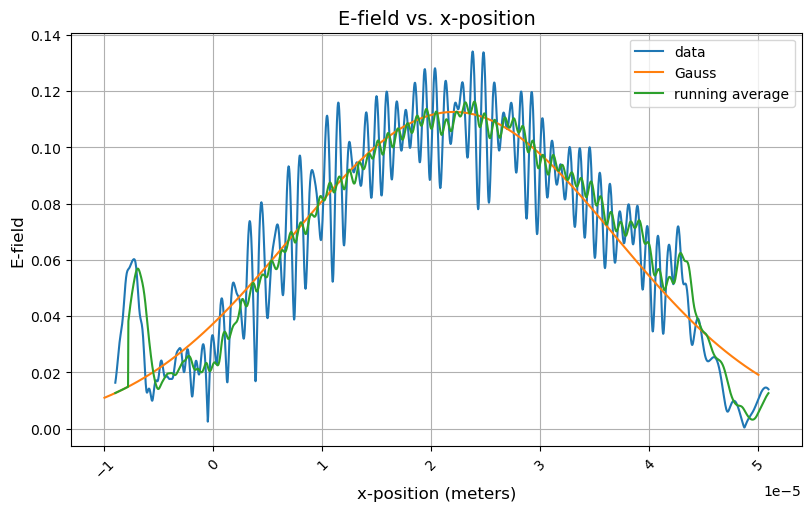

0.845016646059968


In [11]:
data_path = 'data\\initialFF__0.950.txt'
data = pd.read_csv(data_path, sep=",", header=None)
data.columns = ['x(m)', 'Y']
data = data.drop([0])  # Drop the first row which contains the old header

# Convert the columns to numeric
data['x(m)'] = pd.to_numeric(data['x(m)'])
data['Y'] = pd.to_numeric(data['Y'])

popt, pcov=curve_fit(gaussian,data['x(m)'],data['Y'], p0= [1/210000, 20E-6, 15e-6])
x=np.linspace(-10E-6,50E-6, 100)

# Plot the data
fig, ax = plt.subplots(figsize=(8, 5), layout='constrained')
ax.plot(data['x(m)'], data['Y'], marker='', linestyle='-', label = 'data')
ax.plot(x, gaussian(x,*popt), label='Gauss')

running_av = data['Y'].rolling(window=window_size).mean()
running_av[:40] = gaussian(data['x(m)'],*popt)[:40]
ax.plot(data['x(m)'], running_av, label = 'running average')
r2_running = r2_score(running_av, gaussian(data['x(m)'],*popt))
print(r2_running)

# Use scientific notation for x-axis tick labels if appropriate
ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

# Increase label font size for readability and add a title
ax.set_xlabel('x-position (meters)', fontsize=12)
ax.set_ylabel('E-field', fontsize=12)
ax.set_title('E-field vs. x-position', fontsize=14)

# Rotate x-axis tick labels to prevent overlap
ax.tick_params(axis='x', labelrotation=45, labelsize=10)

# Show grid
ax.grid(True)
ax.legend()
plt.show()

r2 = r2_score(data['Y'], gaussian(data['x(m)'],*popt))
print(r2)

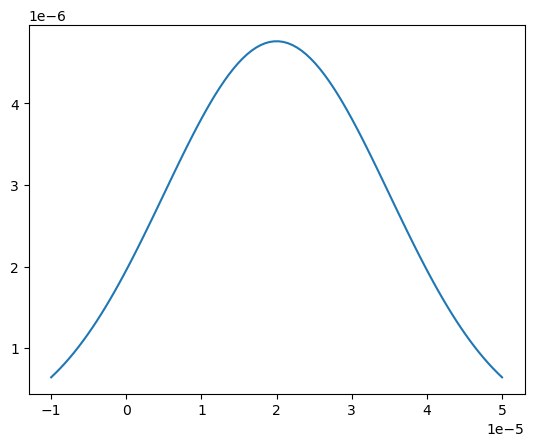

In [12]:
plt.plot(x, gaussian(x, 1/210000, 20E-6, 15e-6))